In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from textblob import TextBlob
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Upload from local
from google.colab import files
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv('social_media_behavior_dataset.csv')  # Replace with your filename

Saving social_media_behavior_dataset.csv to social_media_behavior_dataset (2).csv


In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation/numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Extra punctuation clean
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [ ]:
df['clean_text'] = df['clean_text'].apply(clean_text)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity == -0.05:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install vaderSentiment


# !pip install vaderSentiment
# Successfully installed vaderSentiment-3.3.2

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']  # Get the compound sentiment score
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['VADER_Sentiment'] = df['clean_text'].apply(get_sentiment)
df[['clean_text', 'VADER_Sentiment']].head()

,clean_text,VADER_Sentiment
0,anyone recommend good resources cloudcomputing,Positive
1,sure understand ai someone explain,Positive
2,sure understand ai someone explain,Positive
3,anyone recommend good resources python,Positive
4,sure understand cloudcomputing someone explain,Positive


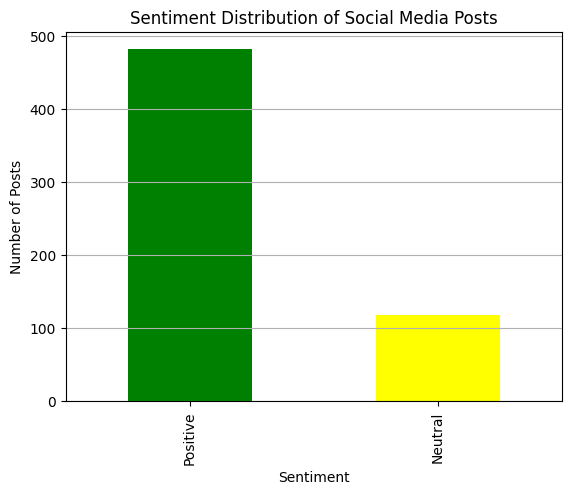

In [ ]:
import matplotlib.pyplot as plt  # helps us draw charts

# Count how many posts fall into each sentiment category
sentiment_counts = df['VADER_Sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar', color=['green', 'yellow', 'red'])

plt.title('Sentiment Distribution of Social Media Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.grid(axis='y')
plt.show()


In [ ]:
# Save the DataFrame to a new CSV file with the cleaned text and sentiment
df.to_csv("cleaned_sentiment_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_sentiment_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>